In [17]:
import pandas as pd

In [18]:
database = pd.read_csv("./Data/Main_Database.csv")
database

,Unnamed: 0,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Tree-covered areas in sq km,...,Rain(mm per year),Suitable_Land_Higher_Than_Median,Demeaned_Cornfield_Area,Demeaned_Forest_Area,Suitable_Land_Higher_Than_Median_pct,Demeaned_Cornfield_Area_pct,Demeaned_Forest_Area_pct,Log Corn,Log Forest,Log Land
0,0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,1.852782,0.147187,12637.0,...,327.0,1,-514.690455,3.637979e-12,1,-0.078912,0.000000,6.866933,9.444384,13.388153
1,1,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,1.852782,0.147187,12637.9,...,327.0,1,-514.690455,3.637979e-12,1,-0.078912,0.000000,6.866933,9.444456,13.388153
2,2,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,1.852782,0.147187,12638.6,...,327.0,1,-514.690455,3.637979e-12,1,-0.078912,0.000000,6.866933,9.444511,13.388153
3,3,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,1.852782,0.147187,12411.2,...,327.0,1,-514.690455,3.637979e-12,1,-0.078912,0.000000,6.866933,9.426355,13.388153
4,4,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,1.852782,0.147187,12408.2,...,327.0,1,-514.690455,3.637979e-12,1,-0.078912,0.000000,6.866933,9.426113,13.388153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53191,53191,Zambia,2021.0,743390.0,ZMB,1410102.0,14101.02,60.030150,1.896854,473059.8,...,1020.0,1,5218.060000,-1.595110e+04,0,0.701928,-2.145724,9.554002,13.066977,13.518976
53192,53192,Zambia,2021.0,743390.0,ZMB,1410102.0,14101.02,60.030150,1.896854,471995.7,...,1020.0,1,5218.060000,-1.595110e+04,0,0.701928,-2.145724,9.554002,13.064725,13.518976
53193,53193,Zambia,2021.0,743390.0,ZMB,1410102.0,14101.02,60.030150,1.896854,471548.3,...,1020.0,1,5218.060000,-1.595110e+04,0,0.701928,-2.145724,9.554002,13.063777,13.518976
53194,53194,Zambia,2021.0,743390.0,ZMB,1410102.0,14101.02,60.030150,1.896854,471264.1,...,1020.0,1,5218.060000,-1.595110e+04,0,0.701928,-2.145724,9.554002,13.063174,13.518976


### IV analysis

The idea behind using an instrumental variable is to **isolate the expected negative effect of cornfield area on forest area**. 

The instrumental variable we are going to choose needs to be **strongly correlated** with the cornfield area. This condition is called the **relevance condition**.

 - Our argument is that corn prices are a key determinant of farmers' planting decisions because when **corn prices rise**, farmers have an economic incentive to devote more land to corn production which increases the cornfield area. Conversely, when **corn prices fall**, there may be less incentive to expand cornfields. Therefore, we expect the correlation between cornfield area and corn price data to be **strongly correlated**


The instrumental variable needs to be **uncorrelated** with the unobserved determinants of forest area meaning that it should effect **forest area only through cornfield area**. This condition is called the **exclusion condition**. One difficulty regarding this condition is that it cannot be statistically tested like the **relevance condition**.

 - Corn prices are mainly driven by:
  
  **Changes in cross-country trade policies** : For example, suppose a major corn exporter-country decided to impose tariffs on corn which they export causing the global price of corn to increase. This causes farmers in countries who did not impose similar restrictions to expand their cornfield areas in order to capitalize on the increased profitability of growing corn assuming the cost of corn cultivation stays identical. Therefore, increased corn prices can cause deforestation **only through the decision of farmers to expand cornfield areas**.

  **Changes in local environmental conservation policies**: For example, a conservation policy may restrict the expansion of a specific crop into newly deforested areas. If corn prices rise and geographic conditions are suitable for corn cultivation, farmers may see corn as a **strong substitute** and choose to plant corn instead. This means newly deforested areas could be replaced with cornfields. As a result, higher corn prices can lead to deforestation only through the expansion of cornfield areas.

  **Global conflicts**: Global conflicts such as the one between Russia and Ukraine which began in 2022. The Russia-Ukraine conflict disrupted global corn exports, causing prices to rise significantly. In regions with favorable conditions, farmers took advantage of higher prices by expanding their cornfield areas to increase profits. This expansion often involved clearing forested land, linking higher corn prices to deforestation only through the farmers' decisions to convert forests into farmland.


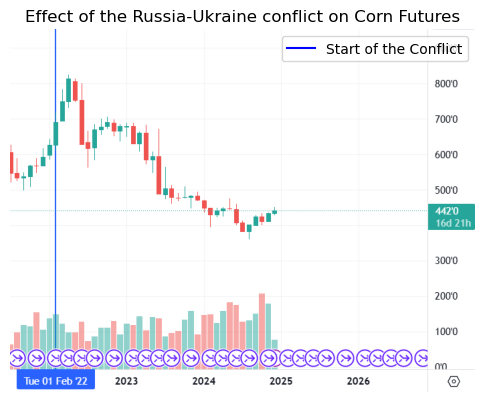

In [19]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = "./Data/Corn_price_conflict.png"
img = Image.open(image_path)

# Display the image
plt.figure(figsize=(6, 5))
plt.imshow(img)
plt.axis('off')  # Hide axes for better visualization
plt.title("Effect of the Russia-Ukraine conflict on Corn Futures")

# Adding a legend with a blue line
plt.plot([], [], color='blue', label='Start of the Conflict')  # Dummy line for the legend
plt.legend(loc='upper right', fontsize=10)

plt.show()


The effect is clear


 Adding the paper: Commodity Prices and Robust Environmental Regulation:
Evidence from Deforestation in Brazil
Torfinn Harding, Julika Herzberg and Karlygash Kuralbayeva*
October 4, 2020



  **Global market events**



Corn as a commodity: Research

We can use the analysis regarding this research to isolate the causality relationship beteen cornfield area and forest area

In [20]:
database

,Unnamed: 0,Country,Year,landArea,iso3,Total Size Cornfield in ha,Total Size Cornfield in sq km,% of Forest Area,% of Cornfield Area,Tree-covered areas in sq km,...,Rain(mm per year),Suitable_Land_Higher_Than_Median,Demeaned_Cornfield_Area,Demeaned_Forest_Area,Suitable_Land_Higher_Than_Median_pct,Demeaned_Cornfield_Area_pct,Demeaned_Forest_Area_pct,Log Corn,Log Forest,Log Land
0,0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,1.852782,0.147187,12637.0,...,327.0,1,-514.690455,3.637979e-12,1,-0.078912,0.000000,6.866933,9.444384,13.388153
1,1,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,1.852782,0.147187,12637.9,...,327.0,1,-514.690455,3.637979e-12,1,-0.078912,0.000000,6.866933,9.444456,13.388153
2,2,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,1.852782,0.147187,12638.6,...,327.0,1,-514.690455,3.637979e-12,1,-0.078912,0.000000,6.866933,9.444511,13.388153
3,3,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,1.852782,0.147187,12411.2,...,327.0,1,-514.690455,3.637979e-12,1,-0.078912,0.000000,6.866933,9.426355,13.388153
4,4,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,1.852782,0.147187,12408.2,...,327.0,1,-514.690455,3.637979e-12,1,-0.078912,0.000000,6.866933,9.426113,13.388153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53191,53191,Zambia,2021.0,743390.0,ZMB,1410102.0,14101.02,60.030150,1.896854,473059.8,...,1020.0,1,5218.060000,-1.595110e+04,0,0.701928,-2.145724,9.554002,13.066977,13.518976
53192,53192,Zambia,2021.0,743390.0,ZMB,1410102.0,14101.02,60.030150,1.896854,471995.7,...,1020.0,1,5218.060000,-1.595110e+04,0,0.701928,-2.145724,9.554002,13.064725,13.518976
53193,53193,Zambia,2021.0,743390.0,ZMB,1410102.0,14101.02,60.030150,1.896854,471548.3,...,1020.0,1,5218.060000,-1.595110e+04,0,0.701928,-2.145724,9.554002,13.063777,13.518976
53194,53194,Zambia,2021.0,743390.0,ZMB,1410102.0,14101.02,60.030150,1.896854,471264.1,...,1020.0,1,5218.060000,-1.595110e+04,0,0.701928,-2.145724,9.554002,13.063174,13.518976
